In [1]:
!wget https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/master/secciones/06.RegresionLineal/Cars93.csv

--2018-09-19 06:50:28--  https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/master/secciones/06.RegresionLineal/Cars93.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14870 (15K) [text/plain]
Saving to: ‘Cars93.csv’

Cars93.csv          100%[===================>]  14,52K  --.-KB/s    in 0,05s   

2018-09-19 06:50:29 (266 KB/s) - ‘Cars93.csv’ saved [14870/14870]



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
from pandas.tools import plotting

In [4]:
data = pd.read_csv('Cars93.csv')

In [5]:
data

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [8]:
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [150]:
subset_data = data[['Price', 'Horsepower', 'MPG.highway', 'Turn.circle']]
subset_data

,Price,Horsepower,MPG.highway,Turn.circle
0,15.9,140,31,37
1,33.9,200,25,38
2,29.1,172,26,37
3,37.7,172,26,37
4,30.0,208,30,39
5,15.7,110,31,41
6,20.8,170,28,42
7,23.7,180,25,45
8,26.3,170,27,41
9,34.7,200,25,43


In [151]:
linear =  sklearn.linear_model.LinearRegression()
linear0 = sklearn.linear_model.LinearRegression()
linear1 = sklearn.linear_model.LinearRegression()
linear2 = sklearn.linear_model.LinearRegression()
linear3 = sklearn.linear_model.LinearRegression()
linear5 = sklearn.linear_model.LinearRegression()
linear6 = sklearn.linear_model.LinearRegression()


Text(0.5,1,'Price vs MPG.highway $R^2$ = 0.314')

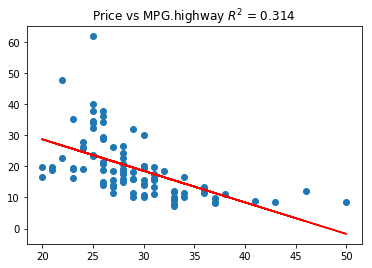

In [152]:
#Punto 1
Y = data['Price'].values.reshape(-1,1)
X = data['Horsepower'].values.reshape(-1,1)
X0 = data['MPG.highway'].values.reshape(-1,1)
X1 = data['Turn.circle'].values.reshape(-1,1)
linear.fit(X,Y)
linear0.fit(X0,Y)
plt.scatter(X0,Y)
plt.plot(X0,linear0.predict(X0), color = 'r')
plt.title(r"Price vs MPG.highway $R^2$ = {:.3f}".format(linear0.score(X0,Y)))

Y = b0 + b1 * MPG.highway R^2 = 0.314
Y = b0 + b1 * Turn.circle R^2 = 0.154
Y = b0 + b1 * Horsepower R^2 = 0.621


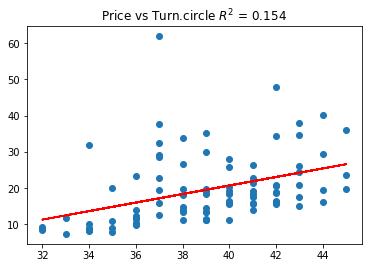

In [153]:
linear1.fit(X1,Y)
plt.scatter(X1,Y)
plt.plot(X1,linear1.predict(X1), color = 'r')
plt.title(r"Price vs Turn.circle $R^2$ = {:.3f}".format(linear1.score(X1,Y)))
print("Y = b0 + b1 * MPG.highway R^2 = {:.3f}".format(linear0.score(X0, Y)))
print("Y = b0 + b1 * Turn.circle R^2 = {:.3f}".format(linear1.score(X1, Y)))
print("Y = b0 + b1 * Horsepower R^2 = {:.3f}".format(linear.score(X, Y)))




Se observa que el modelo con mejor R es el del Horsepower

<Figure size 432x288 with 0 Axes>

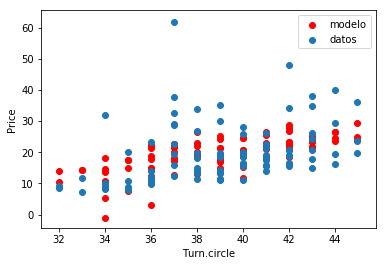

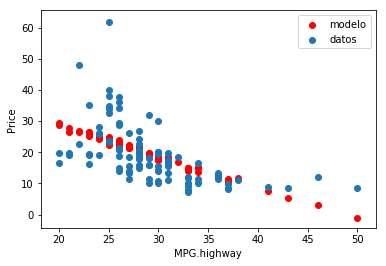

<Figure size 432x288 with 0 Axes>

In [154]:
#Punto2
X3 = data[['Turn.circle', 'MPG.highway']]
linear3.fit(X3,Y)
xlabel = "Turn.circle"
plt.scatter(X3[xlabel], linear3.predict(X3), label = 'modelo', color = 'r')
plt.scatter(X3[xlabel], Y, label = 'datos')
plt.xlabel(xlabel)
plt.legend()
_=plt.ylabel("Price")
plt.figure()
xlabel2 = "MPG.highway"
plt.scatter(X3[xlabel2], linear3.predict(X3),label = 'modelo', color = 'r')
plt.scatter(X3[xlabel2], Y, label = "datos")
plt.xlabel(xlabel2)
plt.legend()
_=plt.ylabel("Price")
plt.figure()

<Figure size 432x288 with 0 Axes>

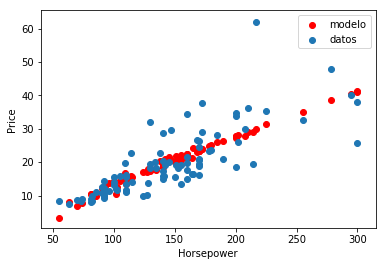

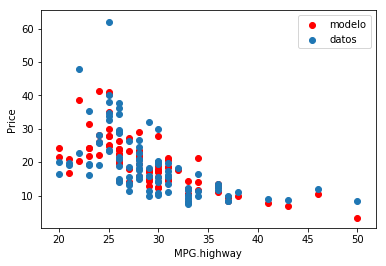

<Figure size 432x288 with 0 Axes>

In [155]:
X4 = data[['Horsepower', 'MPG.highway']]
linear4.fit(X4,Y)
xlabel = "Horsepower"
plt.scatter(X4[xlabel], linear4.predict(X4), label = 'modelo', color = 'r')
plt.scatter(X4[xlabel], Y, label = 'datos')
plt.xlabel(xlabel)
plt.legend()
_=plt.ylabel("Price")
plt.figure()
xlabel2 = "MPG.highway"
plt.scatter(X4[xlabel2], linear4.predict(X4),label = 'modelo', color = 'r')
plt.scatter(X4[xlabel2], Y, label = "datos")
plt.xlabel(xlabel2)
plt.legend()
_=plt.ylabel("Price")
plt.figure()

<Figure size 432x288 with 0 Axes>

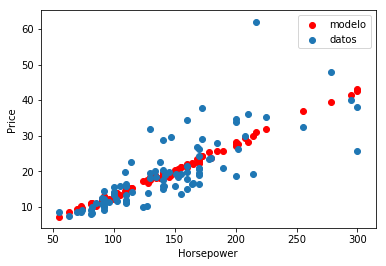

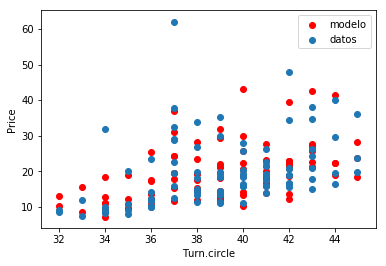

<Figure size 432x288 with 0 Axes>

In [156]:
X5 = data[['Horsepower', 'Turn.circle']]
linear5.fit(X5,Y)
xlabel = "Horsepower"
plt.scatter(X5[xlabel], linear5.predict(X5), label = 'modelo', color = 'r')
plt.scatter(X5[xlabel], Y, label = 'datos')
plt.xlabel(xlabel)
plt.legend()
_=plt.ylabel("Price")
plt.figure()
xlabel2 = "Turn.circle"
plt.scatter(X5[xlabel2], linear5.predict(X5),label = 'modelo', color = 'r')
plt.scatter(X5[xlabel2], Y, label = "datos")
plt.xlabel(xlabel2)
plt.legend()
_=plt.ylabel("Price")
plt.figure()

In [157]:
print("MPG.highway y Turn.circle R^2 = {:.3f}".format(linear3.score(X3, Y)))
print("Horsepower y Turn.circle R^2 = {:.3f}".format(linear5.score(X5, Y)))
print("Horsepower y MPG.highway R^2= {:.3f}".format(linear4.score(X4, Y)))

MPG.highway y Turn.circle R^2 = 0.320
Horsepower y Turn.circle R^2 = 0.625
Horsepower y MPG.highway R^2= 0.630


Modelo de 3 variables R^2 = 0.640


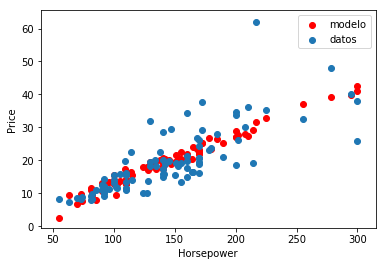

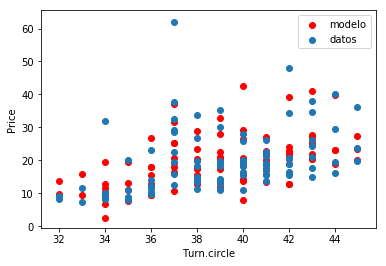

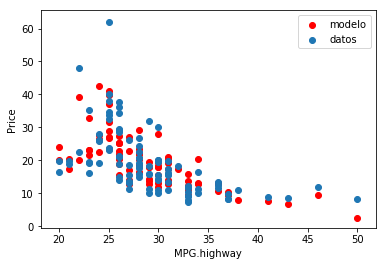

<Figure size 432x288 with 0 Axes>

In [158]:
X6 = data[['Horsepower', 'Turn.circle', 'MPG.highway']]
linear6.fit(X6,Y)
xlabel = "Horsepower"
plt.scatter(X6[xlabel], linear6.predict(X6), label = 'modelo', color = 'r')
plt.scatter(X6[xlabel], Y, label = 'datos')
plt.xlabel(xlabel)
plt.legend()
_=plt.ylabel("Price")
plt.figure()
xlabel2 = "Turn.circle"
plt.scatter(X6[xlabel2], linear6.predict(X6),label = 'modelo', color = 'r')
plt.scatter(X6[xlabel2], Y, label = "datos")
plt.xlabel(xlabel2)
plt.legend()
_=plt.ylabel("Price")
xlabel3 = "MPG.highway"
plt.figure()
plt.scatter(X6[xlabel3], linear6.predict(X6),label = 'modelo', color = 'r')
plt.scatter(X6[xlabel3], Y, label = "datos")
plt.xlabel(xlabel3)
plt.legend()
_=plt.ylabel("Price")
plt.figure()
print("Modelo de 3 variables R^2 = {:.3f}".format(linear6.score(X6, Y)))


In [164]:
subset_data

,Price,Horsepower,MPG.highway,Turn.circle
0,15.9,140,31,37
1,33.9,200,25,38
2,29.1,172,26,37
3,37.7,172,26,37
4,30.0,208,30,39
5,15.7,110,31,41
6,20.8,170,28,42
7,23.7,180,25,45
8,26.3,170,27,41
9,34.7,200,25,43


In [177]:
def model0(x,params):
    return x*params[1] + params[0]
    
def loglike0(x_obs, y_obs, y_sigma_obs, params):
    y_model = model0(x_obs,params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    return np.sum(d - np.log(norm))
def evidence0(x_obs, y_obs, y_sigma_obs,model, n_dim=1, N = 100000):
    params = np.random.random(N * n_dim) * 2.0 - 1.0
    params = np.reshape(params, [N, n_dim])
    loglike_params = np.zeros(N)
    for i in range(N):
        loglike_params[i] = loglike0(x_obs, y_obs, y_sigma_obs, params[i,:])
    
    e = np.exp(loglike_params)    
    return np.mean(e)

In [178]:
a = evidence0(X[:,0],Y[:,0], np.std(Y[:,0]), linear, n_dim=2)
b = evidence0(X0[:,0],Y[:,0], np.std(Y[:,0]), linear0, n_dim=2)
c = evidence0(X1[:,0],Y[:,0], np.std(Y[:,0]), linear1, n_dim=2)
print("Evidencia para Y(Horsepower):")
print(a)
print("Evidencia para Y(MPG.highway):")
print(b)
print("Evidencia para Y(Turn.circle):")
print(c)

Evidencia para Y(Horsepower):
5.392571193740382e-139
Evidencia para Y(MPG.highway):
3.1891330762099246e-161
Evidencia para Y(Turn.circle):
8.098229336020878e-149


In [202]:
def model1(x,y,params):
    return x*params[1] + params[0] + y*params[2]
    
def loglike1(x_obs0, x_obs1, y_obs, y_sigma_obs, params):
    y_model = model1(x_obs0,x_obs1,params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    return np.sum(d - np.log(norm))
def evidence1(x_obs0, x_obs1, y_obs, y_sigma_obs,model, n_dim=1, N = 100000):
    params = np.random.random(N * n_dim) * 2.0 - 1.0
    params = np.reshape(params, [N, n_dim])
    loglike_params = np.zeros(N)
    for i in range(N):
        loglike_params[i] = loglike1(x_obs0, x_obs1, y_obs, y_sigma_obs, params[i,:])
    
    e = np.exp(loglike_params)    
    return np.mean(e)

In [ ]:
linear3.intercept_
heh = linear3.coef_
a = evidence1(X3['Turn.circle'], X3["MPG.highway"],Y[:,0], np.std(Y[:,0]), linear, n_dim=3)
print(a)
b = evidence1(X4['Horsepower'], X3["MPG.highway"],Y[:,0], np.std(Y[:,0]), linear, n_dim=3)
print(a)
c = evidence1(X3['Horsepower'], X3['Turn.circle'],Y[:,0], np.std(Y[:,0]), linear, n_dim=3)
print(a)
#plt.scatter(X3["MPG.highway"], Y)
#plt.scatter(X3["MPG.highway"], linear3.intercept_ + X3["Turn.circle"] * heh[0][0])
#plt.scatter(X3["MPG.highway"], linear3.predict(X3))

In [193]:
linear3.intercept_


array([35.4016788])